# Social Media Prediction - 15 seconds

- team name: aaaaaaaaaaa
- team members
    - Marc-Antoine Bélanger
    - Eric Brunet
    - Jean-Philippe Gagnon-Fleury
- current submission
    - score: 1.69961
    - model: voting regressor
        - random forest regressor
        - gradient boosting regressor
        - custom regressor


# Project - 45 seconds

https://github.com/ebrunet28/smp

- 20 branches
- 119 commits
- 29 pull requests
- 75 builds
- based on [whisk](https://github.com/whisk-ml/whisk) framework


# Data Cleaning - 30 seconds

In [6]:
from smp.features.features import Loader

loader = Loader()

print(loader.train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, AL85S14OMDPF01I9 to LLKNQ56IFCSSCOT6
Data columns (total 23 columns):
User Name                                      7500 non-null object
Personal URL                                   3256 non-null object
Profile Cover Image Status                     7410 non-null object
Profile Verification Status                    7500 non-null object
Profile Text Color                             7434 non-null object
Profile Page Color                             7422 non-null object
Profile Theme Color                            7428 non-null object
Is Profile View Size Customized?               7500 non-null bool
UTC Offset                                     7014 non-null float64
Location                                       6039 non-null object
Location Public Visibility                     7500 non-null object
User Language                                  7500 non-null object
Profile Creation Timestamp                     7500 non-

- Dropped
    - User Name
    - Location ?
- Lower case
- Simple imputers
    - Most frequenct
    - Mean
- Outliers ?


# Data Analysis - 30 seconds

- talk here about log transforms
- show relevant charts

[Pipeline] .......... (step 1 of 2) Processing ToVector, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing MissingIndicator, total=   0.0s


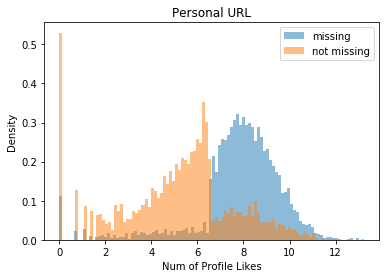

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from smp.features.boolean import PersonalURL

feature = PersonalURL()
X = feature.fit_transform(X=loader.train)
y = np.log(1 + loader.train["Num of Profile Likes"])

_ = plt.hist(y[X.reshape(-1)], bins=100, alpha=0.5, density=True, label="missing")
_ = plt.hist(y[~X.reshape(-1)], bins=100, alpha=0.5, density=True, label="not missing")

_ = plt.title(feature.var_name)
_ = plt.xlabel("Num of Profile Likes")
_ = plt.ylabel("Density")
_ = plt.legend()


# Feature Engineering - 1 minute 30 seconds

TODO: describe preprocessing
<br>TODO: describe major theme of encoding/processing and return types, such as bool, vectors, rgb, etc
<br>TODO: make final count of number of features

<br>

- Missing indicators
- Binary/One-hot encoders
- Log transforms
- Standard scalers
- Convert timestamp to timedelta
- PCA
- HEX to RGB

<br>

- boolean
    - Personal URL
    - Is Profile View Size Customized?
    - Location
- categorical
    - Profile Cover Image Status
    - Profile Verification Status
    - Location Public Visibility
    - User Language
    - User Time Zone
    - Profile Category
- discrete
    - UTC Offset
    - Num of Followers
    - Num of People Following
    - Num of Status Updates
    - Num of Direct Messages
- elapsed time
    - Profile Creation Timestamp
- float
    - Avg Daily Profile Visit Duration in seconds
    - Avg Daily Profile Clicks
- image
    - Profile Image
- rgb
    - Profile Text Color
    - Profile Page Color
    - Profile Theme Color


## Model Approach - 2 minute 30 seconds

- feature engineering pipeline

```yaml
datasets:
  default: &dataset_default
    cls: smp.features.features.Dataset
    parameters:
      transformer_list:
        - *feat_PersonalUrl_default
        - *feat_ProfileCoverImageStatus_default
        - *feat_ProfileVerificationStatus_default
        - *feat_IsProfileViewSizeCustomized_default
        - *feat_ProfileTextColor_default
        - *feat_ProfilePageColor_default
        - *feat_ProfileThemeColor_default
        - *feat_UtcOffset_default
        - *feat_Location_default
        - *feat_LocationPublicVisibility_default
        - *feat_UserLanguage_default
        - *feat_ProfileCreationTimestamp_default
        - *feat_UserTimeZone_default
        - *feat_NumOfFollowers_default
        - *feat_NumOfPeopleFollowing_default
        - *feat_NumOfStatusUpdates_default
        - *feat_NumOfDirectMessages_default
        - *feat_ProfileCategory_default
        - *feat_AvgDailyProfileVisitDuration_default
        - *feat_AvgDailyProfileClicks_default
        - *feat_ProfileImage_default
```

- model selection pipeline

```yaml
trials:
  - pipeline: *pipe_default
    parameters:
      estimator:
        cls: sklearn.linear_model.LinearRegression
        parameters: { }
      param_grid:
       fit_intercept: [True, False]
       normalize: [True, False]
```

In [8]:
from smp.train.__main__ import main

file_name = "example.yml"
main(file_name=file_name)

[Pipeline] .. (step 1 of 3) Processing Building Dataset, total=   7.3s
[Pipeline] .......... (step 2 of 3) Processing To Dense, total=   0.0s
[Pipeline] ....... (step 3 of 3) Processing Grid Search, total=   0.4s
{'best_params': {'fit_intercept': False, 'normalize': True},
 'best_score': 1.8103085523789917,
 'mean_scores': [89302838675891.78,
                 6312172269.545668,
                 1.8103085523789917,
                 1.8103085523789917]}


- linear model
    - linear regression
    - ridge
    - lasso
- random forest regressor
- gradient boosting regressor
- custom regressor
    - agglomerative clustering
    - knn classifier
    - gradient boosting regressor
- voting regressor
    - random forest regressor
    - gradient boosting regressor
    - custom regressor


## Validation Approach - 1 minute

- replicated RMSLE
- validation pipeline
    - grid search
    - 5-fold CV

```yaml
pipelines:
  default: &pipe_default
    - *dataset_default
    - cls: smp.features.features.ToDense
      parameters: {}
    - cls: sklearn.model_selection.GridSearchCV
      name: Grid Search
      parameters:
        estimator:
          $ref: estimator
        param_grid:
          $ref: param_grid
        n_jobs: -1
        scoring: "neg_mean_squared_error"
```

In [10]:
from smp.train.__main__ import main

file_name = "voting_regressor.yml"
main(file_name=file_name)

[Pipeline] .. (step 1 of 3) Processing Building Dataset, total=   5.3s
[Pipeline] .......... (step 2 of 3) Processing To Dense, total=   0.0s
[Pipeline] ....... (step 3 of 3) Processing Grid Search, total=  56.7s
{'best_params': {'weights': [0.25, 0.25, 0.75]},
 'best_score': 1.7076205048759703,
 'mean_scores': [1.7076205048759703]}


- voting regressor
```json
{
    "mean_scores": [
        1.7128306493934538,
        1.7101315096599865,
        1.711614757488679,
        1.7107592809554562
    ],
    "best_params": {"weights": [0.25, 0.25, 0.75]},
    "best_score": 1.7101315096599865
}
```
    - scored 1.70 on public leaderboard